# Human Activity Recognition Project


## Part 1. Data pre processing

Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Global Variables
totaldatasets = 19 # Total number of datasets in file

Load datasets

In [2]:
# Returns an individual dataset as a pandas dataframe. 
# requested_dataSet is the number of the selected dataset, from 1 to 19
# If the number is outside the range of 1 to 19, function returns dataset 1
def getDataset(requested_dataSet):
    if requested_dataSet < 1 or requested_dataSet > totaldatasets:
        requested_dataSet = 1
    dataSet = pd.read_csv('daliac/dataset_'+str(requested_dataSet)+'.txt', sep=',', header=None)
    return dataSet

# Returns all datasets as a list of dataframes
def getAllDatasets():
    dataSets = []
    for n in range(1, totaldatasets + 1):
        dataSets.append(getDataset(n))
    return dataSets

dfx = getAllDatasets()

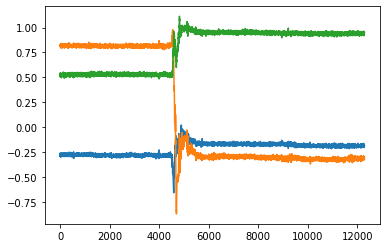

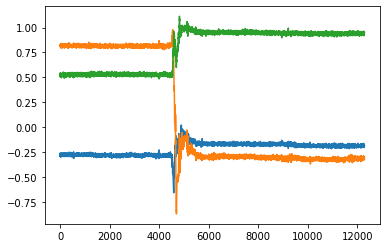

In [3]:

df_sitting = dfx[1][dfx[1][24] == 1].values
    # In this example code, only accelerometer 1 data (column 1 to 3) is used
plt.plot(df_sitting[:, 0:3])
plt.show()

df = getDataset(2)
df_sitting = df[df[24] == 1].values
    # In this example code, only accelerometer 1 data (column 1 to 3) is used
plt.plot(df_sitting[:, 0:3])
plt.show()

In [4]:
# A class for handling data 
class dataSets:
    #Constants for activities
    SITTING = 1
    LYING = 2
    STANDING = 3
    WASHINGDISHES = 4 
    VACUUMING = 5 
    SWEEPING = 6 
    WALKING = 7 
    ASCENDSTAIRS = 8
    DESCENDSTAIRS = 9  
    TREADMILLRUN = 10
    CYCLE50W = 11
    CYCLE100W = 12
    ROPEJUMP = 13
    
    #Constants for sensors.
    WRIST_ACCELEROMETER = 0
    WRIST_GYROSCOPE = 3
    CHEST_ACCELEROMETER = 6
    CHEST_GYROSCOPE = 9
    HIP_ACCELEROMETER = 12
    HIP_GYROSCOPE = 15
    ANKLE_ACCELEROMETER = 18
    ANKLE_GYROSCOPE = 21
    
    def __init__(self, dataSet_collection):
        self.dataSet_collection = dataSet_collection
    
    def getSubjectActivity(self, subject, activity):
        return self.dataSet_collection[subject][self.dataSet_collection[subject][24] == activity].values
    
    def getActivitySensor(self, subject, activity, sensor):
        return self.getSubjectActivity(subject, activity)[:, sensor:sensor+3]
    
HAR_dataset = dataSets(getAllDatasets())